In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

#data from http://www.inalitic.com/datasets/mlb%20pitch%20data.html

Code Definitions #

While these aren't spelled out anywhere, play descriptions allowed confident identification of these codes

B - Ball

*B - Ball in dirt

S - Swinging Strike

C - Called Strike

F - Foul

T - Foul Tip

L - Foul Bunt

I - Intentional Ball

W - Swinging Strike (Blocked)

M - Missed Bunt

P - Pitchout

Q - Swinging pitchout

R - Foul pitchout

Values that only occur on last pitch of at-bat:

X - In play, out(s)

D - In play, no out

E - In play, runs

H - Hit by pitch

we need to look at 

px: left\right ball placement over plate, 0 is right down the middle

pz: up/down ball placement over plate, 0 is ground

sz_bot: bottom of strike zone from ground, in feet

sz_top: top of strike zone from ground, in feet

zone: PitchFX zone number. Labeled as 1-9 for inside strikezone and 11-14 for outside strikezone. there is no 10

type: Simplified pitch outcome codes, S (strike) B (ball) or X (in play)

s_count: Count of strikes for current at-bat and pitch sequence.

event: 	Description of at-bat result.

umpire_HP: 	Name of homeplate umpire for that game.

In [11]:
########### DO NOT RUN
#load pitches.csv
pitches = pd.read_csv('pitches.csv')

#make pandas dataframe 
pitch_df = pd.DataFrame(pitches)

In [12]:
pitch_df.head(6)

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0
5,0.627,2.397,92.9,84.8,2743.856,148.110,-45.7,3.7,23.7,13.590,...,8,0.0,2.015000e+09,2.0,2.0,0.0,6.0,0.0,0.0,0.0


In [5]:
# #list pitch_df columns
# # pitch_df.columns
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# #get the first 100 rows of 'code'
# pitch_df['code'].head(100)

In [13]:
#remove unnecessary columns 'start_speed', 'end_speed', 'spin_rate', 'spin_dir','break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az','type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0','z0', 'pfx_x', 'pfx_z', 'nasty','event_num', 'b_score', 'ab_id',outs','pitch_num', 'on_1b', 'on_2b', 'on_3b' 
pitch_df = pitch_df.drop(['start_speed', 'end_speed', 'spin_rate', 'spin_dir','break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az','type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0','z0', 'pfx_x', 'pfx_z', 'nasty','event_num', 'b_score', 'ab_id', 'outs','pitch_num', 'on_1b', 'on_2b', 'on_3b'], axis=1)


In [7]:
#get head of dataframe
# pitch_df.head()

In [14]:
#save as pickle
pitch_df.to_pickle('pitch_df_sorted.pkl')

In [15]:
#load pickle
pitch_df = pd.read_pickle('pitch_df_sorted.pkl')

In [16]:
pitch_df.head()

,px,pz,sz_bot,sz_top,zone,code,type,pitch_type,b_count,s_count
0,0.416,2.963,1.72,3.56,3.0,C,S,FF,0.0,0.0
1,-0.191,2.347,1.72,3.56,5.0,S,S,FF,0.0,1.0
2,-0.518,3.284,1.72,3.56,1.0,F,S,FF,0.0,2.0
3,-0.641,1.221,1.74,3.35,13.0,B,B,FF,0.0,2.0
4,-1.821,2.083,1.72,3.56,13.0,B,B,CU,1.0,2.0


In [17]:
#list columns
pitch_df.columns

Index(['px', 'pz', 'sz_bot', 'sz_top', 'zone', 'code', 'type', 'pitch_type',
       'b_count', 's_count'],
      dtype='object')

In [18]:
#put all C or B into a dataframe
# ball_df = pitch_df[(pitch_df['code'] == 'C') | (pitch_df['code'] == 'B')]


strikes_df = pitch_df[pitch_df['code'] == 'C']
# #called strikes dataframe size 
# strikes_balls_df.shape
# #print column names
# # called_strikes_df.columns
# strikes_balls_df.head()

In [19]:
#strike zone width is 17 inches
sz_width = 17/2/12
sz_width

0.7083333333333334

In [13]:
# for index, row in called_strikes_df.iterrows():
#     #turn sz_top into inches
#     top = called_strikes_df.loc[index, 'sz_top']
#     # print(top)
#     # #turn sz_bot into inches
#     bottom = called_strikes_df.loc[index, 'sz_bot']
#     #get center of strike zone
#     # halfDif = (top - bottom)/2
#     # print("half dif: " + str(halfDif))
#     #get top of strike zone
#     # print("before: " + str(called_strikes_df.loc[index, 'sz_top']))
#     called_strikes_df.loc[index, 'sz_top'] = 0 + halfDif
#     # print("after: " + str(called_strikes_df.loc[index, 'sz_top']))
#     #get bottom of strike zone
#     # print("before: " + str(called_strikes_df.loc[index, 'sz_bot']))
#     called_strikes_df.loc[index, 'sz_bot'] = 0 - halfDif
#     # print("after: " + str(called_strikes_df.loc[index, 'sz_bot']))

In [20]:
strikes_df.head(100)

,px,pz,sz_bot,sz_top,zone,code,type,pitch_type,b_count,s_count
0,0.416,2.963,1.72,3.56,3.0,C,S,FF,0.0,0.0
27,0.815,2.319,1.83,3.74,14.0,C,S,FF,1.0,1.0
29,-1.227,1.872,1.78,3.59,13.0,C,S,FC,2.0,2.0
53,1.238,2.573,1.64,3.61,14.0,C,S,FF,0.0,2.0
61,-0.652,3.016,1.57,3.50,1.0,C,S,FF,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
579,0.309,1.719,1.27,3.27,9.0,C,S,FF,0.0,0.0
586,-1.218,2.561,1.67,3.62,13.0,C,S,FT,0.0,0.0
588,0.460,2.028,1.67,3.75,9.0,C,S,FF,1.0,1.0
599,-0.599,2.488,1.79,3.67,4.0,C,S,SL,1.0,1.0


In [21]:
#if true_strike_df exists, delete it
try:
    del false_strikes_df
except:
    pass  

#make new df with same columns as pitch_df
false_strikes_df = pd.DataFrame(columns=pitch_df.columns)

#make list
strikes_list = []

count = 0
#iterate through each row of called strikes
for index, row in strikes_df.iterrows():
    #get strike zone top and bottom
    sz_top = row['sz_top']
    sz_bot = row['sz_bot']

    # # use sz_width to get strike zone horizontal range
    # sz_horizontal_range = sz_width/2
    # #get strike zone vertical range
    # sz_vertical_range = (sz_top - sz_bot)/2
    #get sz_left
    sz_left = 0 - sz_width
    #get sz_right
    sz_right = 0 + sz_width
    #get x and y coordinates
    x = row['px']
    y = row['pz']
    #print x and y coordinates and strike zone
    # print(x, sz_left, sz_right)
    #check if x and y are within the strike zone
    # if x > sz_left and x < sz_right and y > sz_top and y < sz_bot:
    # if x > sz_left and x < sz_right and y < sz_top and y > sz_bot:

    if x < sz_left or x > sz_right or y > sz_top or y < sz_bot:
        #if so, add row to true strikes df
        # true_strikes_df = true_strikes_df.append(row)
        #if so, concat row to true strikes df
        # print("concat")
        # count+=1
        # fasle_strikes_df = pd.concat([strikes_df, row])
        # false_strikes_df.loc[index] = row
        #add to strikes list
        strikes_list.append(row)
        # print(strikes_list)
# count

In [23]:
#put strikes list into dataframe
strikes_flase_df = pd.DataFrame(strikes_list)


,px,pz,sz_bot,sz_top,zone,code,type,pitch_type,b_count,s_count
27,0.815,2.319,1.83,3.74,14.0,C,S,FF,1.0,1.0
29,-1.227,1.872,1.78,3.59,13.0,C,S,FC,2.0,2.0
53,1.238,2.573,1.64,3.61,14.0,C,S,FF,0.0,2.0
75,1.024,3.080,1.82,3.67,12.0,C,S,FC,2.0,1.0
82,1.184,2.626,1.73,3.70,14.0,C,S,FF,1.0,2.0


In [24]:
strikes_flase_df.shape

(154458, 10)

In [22]:
false_strikes_df.shape

(0, 10)

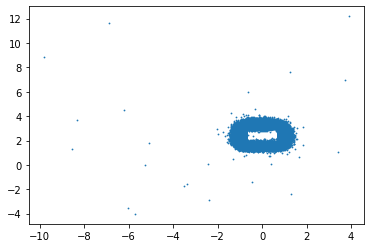

In [27]:
#plot called strikes on a scatter plot
plt.scatter(strikes_flase_df['px'], strikes_flase_df['pz'], cmap='Reds', s=0.6)

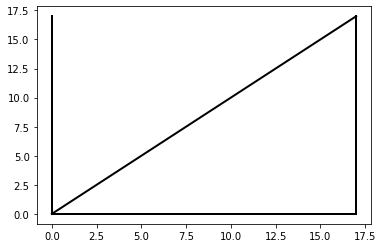

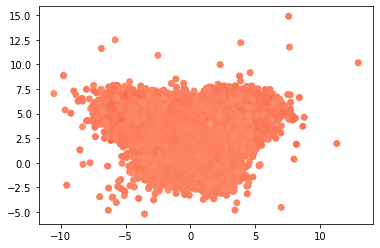

In [6]:
#plot the px and pz of the top and bottom of the strike zone if  the pitch is a strike mark it with a red dot if it is a ball mark it with a blue dot
# plt.scatter(pitch_df['px'], pitch_df['pz'], c=pitch_df['sz_top'], cmap='Reds')
plt.scatter(pitch_df['px'], pitch_df['pz'], c=pitch_df['sz_top'], cmap='Reds')
plt.show()